# Logistic Regression for classification
## Using Pokemon as an example

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Training Data

In [411]:
threshold_original_scale = 600
threshold_normalized = threshold_original_scale / 850
x_train = np.random.random(50) * 850
x_train = x_train / 850
x_features = ["Base Stats"]
y_train = np.where(x_train[:] > threshold_normalized, 1, 0)

w = np.random.randn() 
b = np.random.randn()

#print(x_train)
#print(y_train)
#print(w)
#print(b)


## Plotting the training data

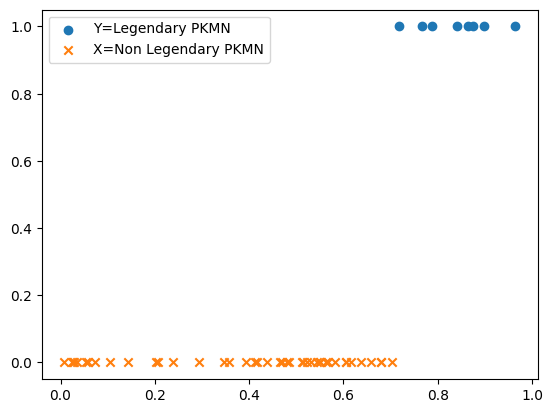

In [412]:
plt.scatter(x_train[x_train > threshold_normalized], y_train[y_train == 1], marker='o',label='Y=Legendary PKMN')
plt.scatter(x_train[x_train < threshold_normalized], y_train[y_train == 0], marker='x', label='X=Non Legendary PKMN')
plt.legend()
plt.show()

## Sigmoid Function

In [413]:
def sigmoid(z):
    g = 1 / (1 + np.exp(-z))
    return g

## Regression Function

In [414]:
def LR(x,w,b):
    z = np.dot(x,w) + b
    return z

## Making Predictions and preliminary evaluation

In [417]:
z = LR(x_train,w,b)
predicts = sigmoid(z)
pred_y = np.where(predicts > threshold_normalized, 1, 0)
results = pred_y == y_train
accuracy = (np.sum(results) / len(results)) * 100

print(f"Your results for each predictions where\nTrue = Right one\nFalse = Wrong One\n\n{results}")
print(f"Accuracy: {accuracy}")
#print(f"\n\nPredictions:{pred_y}")
#print(f"Targets:{y_train}")
#print(len(pred_y))
#print(len(y_train))
#print(predicts)

Your results for each predictions where
True = Right one
False = Wrong One

[False False  True  True False False  True  True  True  True  True False
  True  True  True False False False False False  True  True False False
 False False False  True  True False False  True False False  True  True
  True  True False False False  True  True False  True  True False False
  True  True]
Accuracy: 50.0


## Plotting the Model's predictions

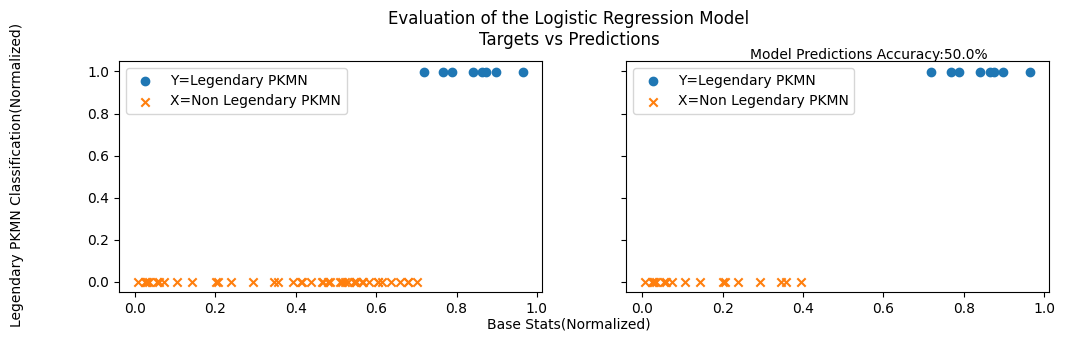

In [419]:
mask_y1 = (x_train > threshold_normalized) & (pred_y == 1)
mask_y2 = (x_train < threshold_normalized) & (pred_y == 0)


fig, ax = plt.subplots(1,2, figsize=(12,3),sharey=True,sharex=True)
ax[0].scatter(x_train[x_train > threshold_normalized], y_train[y_train == 1], marker='o',label='Y=Legendary PKMN')
ax[0].scatter(x_train[x_train < threshold_normalized], y_train[y_train == 0], marker='x', label='X=Non Legendary PKMN')
ax[0].legend()

ax[1].scatter(x_train[mask_y1], pred_y[mask_y1], marker='o',label='Y=Legendary PKMN')
ax[1].scatter(x_train[mask_y2], pred_y[mask_y2], marker='x', label='X=Non Legendary PKMN')
ax[1].legend()

fig.text(0.75,0.9, f'Model Predictions Accuracy:{accuracy}%',ha='center',va='center')
fig.text(0.5, 0, 'Base Stats(Normalized)', ha='center', va='center')
fig.text(0.04, 0.5, 'Legendary PKMN Classification(Normalized)', ha='center', va='center', rotation='vertical')
fig.suptitle("Evaluation of the Logistic Regression Model\nTargets vs Predictions", y=1.05)

plt.show()